In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
X, Y = datasets.load_iris( return_X_y = True)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import tree
# creating dataframe of IRIS dataset
data = pd.DataFrame({'sepallength': iris.data[:, 0], 'sepalwidth': iris.data[:,1],'petallength': iris.data[:, 2],'petalwidth': iris.data[:, 3],
'species': iris.target})

In [7]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

0.9555555555555556


[Text(133.92000000000002, 199.32, 'X[3] <= 0.7\ngini = 0.655\nsamples = 68\nvalue = [44, 33, 28]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 24\nvalue = [44, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.7\ngini = 0.497\nsamples = 44\nvalue = [0, 33, 28]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.9\ngini = 0.111\nsamples = 26\nvalue = [0, 32, 2]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 23\nvalue = [0, 31, 0]'),
 Text(100.44000000000001, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003

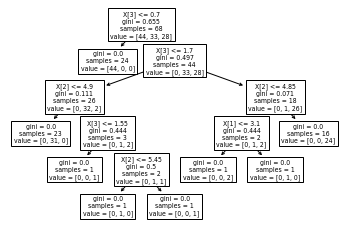

In [9]:
tree.plot_tree(clf.estimators_[1])

In [10]:
clf.predict([[3, 3, 2, 2]])

array([0])

In [11]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal length (cm)    0.477563
petal width (cm)     0.403205
sepal length (cm)    0.082058
sepal width (cm)     0.037175
dtype: float64

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf.fit(X_train,Y_train)
Y_pred2 = et_clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred2))

0.9555555555555556


In [15]:
feature_imp2 = pd.Series(et_clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp2

petal width (cm)     0.421251
petal length (cm)    0.410466
sepal length (cm)    0.108243
sepal width (cm)     0.060041
dtype: float64

[Text(153.45000000000002, 207.55636363636364, 'X[0] <= 6.503\ngini = 0.664\nsamples = 105\nvalue = [38, 36, 31]'),
 Text(55.800000000000004, 187.7890909090909, 'X[2] <= 2.037\ngini = 0.643\nsamples = 87\nvalue = [38, 30, 19]'),
 Text(27.900000000000002, 168.0218181818182, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(83.7, 168.0218181818182, 'X[0] <= 5.078\ngini = 0.475\nsamples = 49\nvalue = [0, 30, 19]'),
 Text(55.800000000000004, 148.25454545454545, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(111.60000000000001, 148.25454545454545, 'X[1] <= 2.519\ngini = 0.485\nsamples = 46\nvalue = [0, 27, 19]'),
 Text(55.800000000000004, 128.48727272727274, 'X[2] <= 4.957\ngini = 0.375\nsamples = 8\nvalue = [0, 6, 2]'),
 Text(27.900000000000002, 108.72, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(83.7, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(167.4, 128.48727272727274, 'X[2] <= 4.341\ngini = 0.494\nsamples = 38\nvalue = [0, 21, 17]'),
 Text(139.5, 108

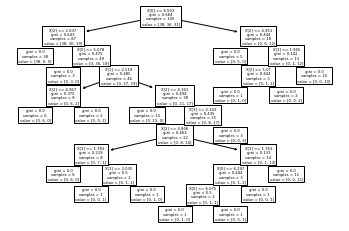

In [16]:
tree.plot_tree(et_clf.estimators_[0])